In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Training_final_v1.0.csv")
df.columns

Index(['season_x', 'team_x', 'opp_team_name', 'assists', 'bonus', 'bps',
       'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded',
       'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes',
       'opponent_team', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW', 'result'],
      dtype='object')

In [3]:
print(df.head())

  season_x   team_x   opp_team_name  assists  bonus  bps  clean_sheets  \
0  2016-17  Arsenal         Arsenal        0      0   23             0   
1  2016-17  Arsenal     Bournemouth        1      1   28             1   
2  2016-17  Arsenal         Burnley        1      3   40             1   
3  2016-17  Arsenal         Chelsea        1      2   38             1   
4  2016-17  Arsenal  Crystal Palace        1      2   36             1   

   creativity  element  fixture  ...  threat  total_points  transfers_balance  \
0        50.0      570      324  ...     6.0             2              16648   
1        42.6      593      332  ...    34.0             6              17484   
2        67.6      593      315  ...    57.0            11              50025   
3        50.0      593      354  ...    32.0            11               5524   
4        53.0      660      312  ...    34.0             8              34784   

   transfers_in transfers_out  value  was_home  yellow_cards  GW    

In [4]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           2116 non-null   object 
 1   team_x             2116 non-null   object 
 2   opp_team_name      2116 non-null   object 
 3   assists            2116 non-null   int64  
 4   bonus              2116 non-null   int64  
 5   bps                2116 non-null   int64  
 6   clean_sheets       2116 non-null   int64  
 7   creativity         2116 non-null   float64
 8   element            2116 non-null   int64  
 9   fixture            2116 non-null   int64  
 10  goals_conceded     2116 non-null   int64  
 11  goals_scored       2116 non-null   int64  
 12  ict_index          2116 non-null   float64
 13  influence          2116 non-null   float64
 14  kickoff_time       2116 non-null   object 
 15  minutes            2116 non-null   int64  
 16  opponent_team      2116 

In [5]:
# Check for missing values
print(df.isnull().sum())

season_x             0
team_x               0
opp_team_name        0
assists              0
bonus                0
bps                  0
clean_sheets         0
creativity           0
element              0
fixture              0
goals_conceded       0
goals_scored         0
ict_index            0
influence            0
kickoff_time         0
minutes              0
opponent_team        0
own_goals            0
penalties_missed     0
penalties_saved      0
red_cards            0
round                0
saves                0
selected             0
team_a_score         0
team_h_score         0
threat               0
total_points         0
transfers_balance    0
transfers_in         0
transfers_out        0
value                0
was_home             0
yellow_cards         0
GW                   0
result               0
dtype: int64


In [6]:
# Summary Statistics
print(df.describe())


           assists        bonus          bps  clean_sheets   creativity  \
count  2116.000000  2116.000000  2116.000000   2116.000000  2116.000000   
mean      0.859641     2.054820    34.284026      0.631853    41.700662   
std       0.648444     1.232277    15.057907      0.482416    21.583278   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     1.000000    26.000000      0.000000    28.600000   
50%       1.000000     3.000000    33.000000      1.000000    41.200000   
75%       1.000000     3.000000    41.000000      1.000000    54.800000   
max       4.000000     3.000000   128.000000      1.000000   170.900000   

           element      fixture  goals_conceded  goals_scored   ict_index  \
count  2116.000000  2116.000000     2116.000000   2116.000000  2116.00000   
mean    616.397448   310.927221        2.231569      0.943762    11.37103   
std     132.931225    55.879873        1.408272      0.708712     5.33813   
min      26.0000

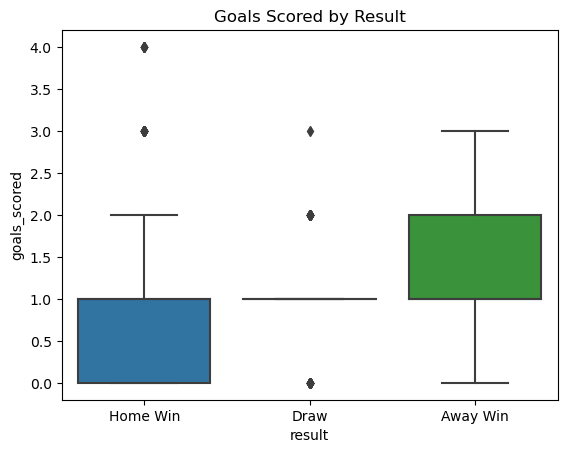

In [7]:
# Bivariate Analysis
# Relationship between 'goals_scored' and 'result'
sns.boxplot(x='result', y='goals_scored', data=df)
plt.title('Goals Scored by Result')
plt.show()


In [8]:
result = df['result']

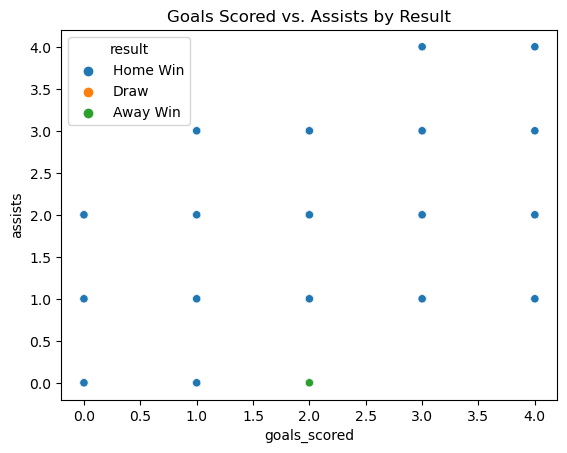

In [9]:
# Multivariate Analysis
# Relationship between 'goals_scored', 'assists', and 'result'
sns.scatterplot(x='goals_scored', y='assists', hue='result', data=df)
plt.title('Goals Scored vs. Assists by Result')
plt.show()

(array([1770.,    0.,    0.,    0.,    0.,  257.,    0.,    0.,    0.,
          89.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

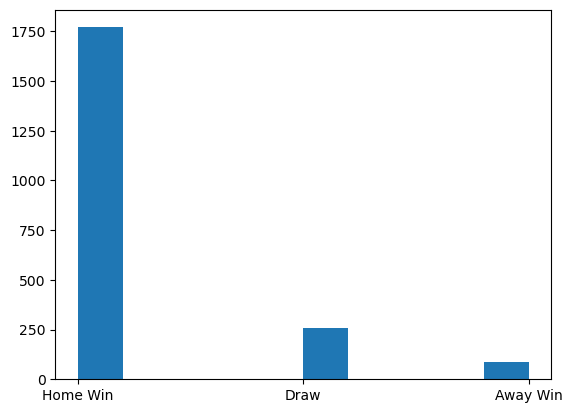

In [10]:
plt.hist(result)

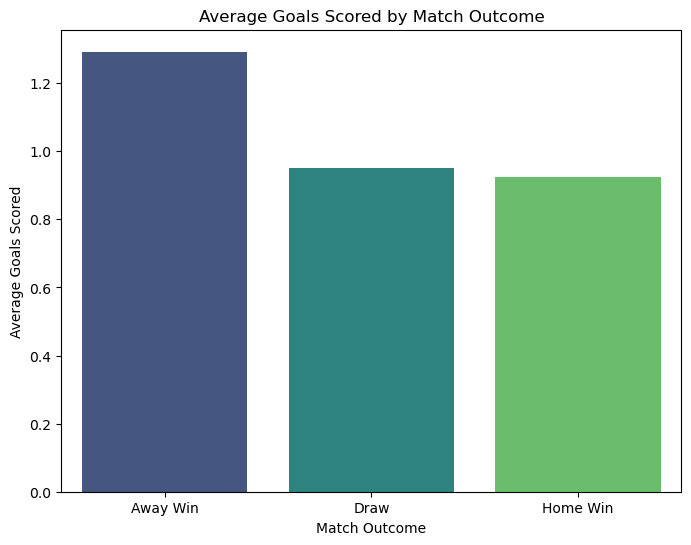

In [11]:
# Grouping by 'result' and calculating average goals scored
avg_goals_by_result = df.groupby('result')['goals_scored'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='result', y='goals_scored', data=avg_goals_by_result, palette='viridis')
plt.title('Average Goals Scored by Match Outcome')
plt.xlabel('Match Outcome')
plt.ylabel('Average Goals Scored')
plt.show()

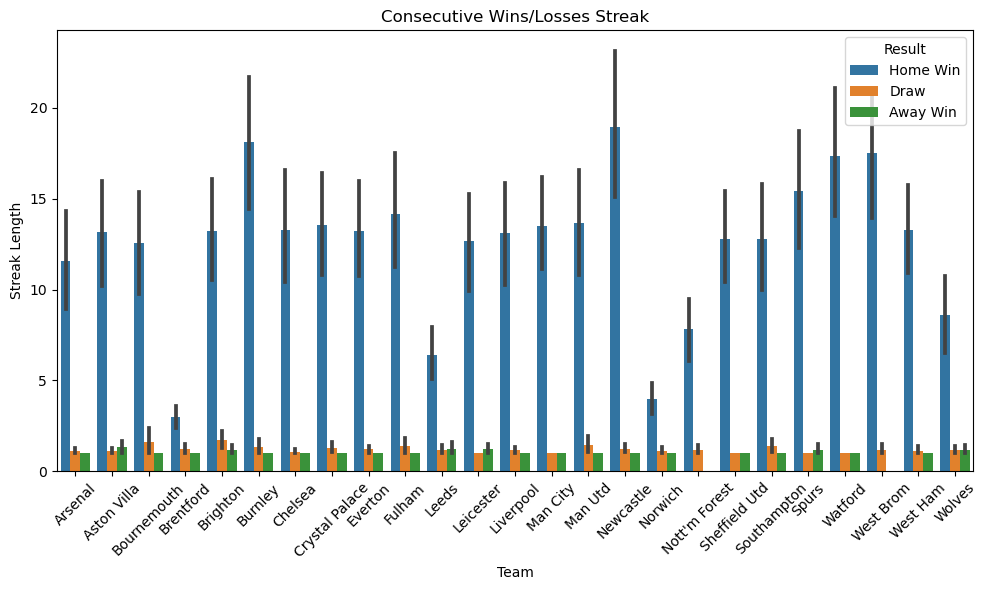

In [12]:
# Assuming 'df' is your dataframe with match results

# Sort the dataframe by team and match date
df.sort_values(by=['team_x', 'kickoff_time'], inplace=True)

# Create a new column to track consecutive wins or losses for each team
df['consecutive_result'] = df['result'] != df['result'].shift(1)

# Initialize variables to track streaks
current_streak = 0
streaks = []

# Iterate through the dataframe to track streaks for each team
for team, consecutive_result in zip(df['team_x'], df['consecutive_result']):
    if consecutive_result:
        current_streak = 1
    else:
        current_streak += 1
    streaks.append(current_streak)

# Add the streaks to the dataframe
df['consecutive_streak'] = streaks

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='team_x', y='consecutive_streak', hue='result', data=df)
plt.title('Consecutive Wins/Losses Streak')
plt.xlabel('Team')
plt.ylabel('Streak Length')
plt.xticks(rotation=45)
plt.legend(title='Result', loc='upper right')
plt.tight_layout()
plt.show()

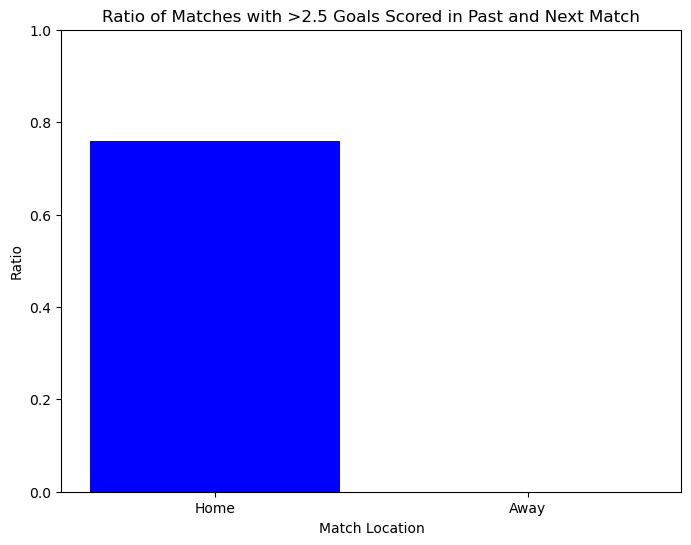

In [13]:
# Assuming 'df' is your dataframe with match results

# Filter the dataframe to include only matches where the team scored more than 2.5 goals
high_scoring_matches = df[df['goals_scored'] > 2.5]

# Check if there are any matches meeting the criteria
if len(high_scoring_matches) > 0:
    # Compute the ratio of matches where the team scored more than 2.5 goals in the past 
    # and scored more than 2.5 goals in the next match, for both home and away matches separately
    home_matches = high_scoring_matches[high_scoring_matches['was_home']]
    away_matches = high_scoring_matches[~high_scoring_matches['was_home']]

    home_ratio = len(home_matches[home_matches['team_a_score'] > 2.5]) / len(home_matches) if len(home_matches) > 0 else 0
    away_ratio = len(away_matches[away_matches['team_h_score'] > 2.5]) / len(away_matches) if len(away_matches) > 0 else 0

    # Visualize the ratio of matches meeting the criteria for both home and away matches
    plt.figure(figsize=(8, 6))
    plt.bar(['Home', 'Away'], [home_ratio, away_ratio], color=['blue', 'green'])
    plt.title('Ratio of Matches with >2.5 Goals Scored in Past and Next Match')
    plt.xlabel('Match Location')
    plt.ylabel('Ratio')
    plt.ylim(0, 1)
    plt.show()
else:
    print("No matches found where the team scored more than 2.5 goals.")